# Netflix Motivations - Data Science Project

Welcome to the Netflix Motivations project! 

**Contributors**: *Christian Rhodes* and *Drew Jepson*

# The Data

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Lasso, Ridge
import seaborn as sns
# Read in the data and store in a DataFrame
df = pd.read_csv("data/titles.csv")

# Print the first 5 rows of the DataFrame
df.dropna(inplace=True)
df.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
5,ts22164,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,"['comedy', 'european']",['GB'],4.0,tt0063929,8.8,73424.0,17.617,8.306
26,ts45948,Monty Python's Fliegender Zirkus,SHOW,Monty Python's Fliegender Zirkus consisted of ...,1972,TV-MA,43,['comedy'],[],1.0,tt0202477,8.1,2151.0,1.487,7.000
35,ts20681,Seinfeld,SHOW,A stand-up comedian and his three offbeat frie...,1989,TV-PG,24,['comedy'],['US'],9.0,tt0098904,8.9,308824.0,130.213,8.301
44,ts22082,Knight Rider,SHOW,"Michael Long, an undercover police officer, is...",1982,TV-PG,51,"['scifi', 'action', 'crime', 'drama']",['US'],4.0,tt0083437,6.9,34115.0,50.267,7.500
45,ts21715,Thomas & Friends,SHOW,Thomas & Friends is a British children's telev...,1984,TV-Y,10,"['animation', 'family', 'comedy', 'fantasy', '...",['GB'],24.0,tt0086815,6.5,5104.0,42.196,6.500


# Classification Tree

In [23]:
# Convert the IMDB score into categories
bins = [0, 4, 7, 10]
labels = ['low', 'medium', 'high']
df['imdb_category'] = pd.cut(df['imdb_score'], bins=bins, labels=labels)

In [24]:
# Select the features and target variable
X = df[['runtime', 'release_year', 'imdb_votes','tmdb_popularity','seasons']]
y = df['imdb_category']

In [25]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [26]:
# Create an instance of the DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=3, random_state=42)

In [27]:
# Train the model on the training set
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [28]:
# Predict the target variable for the testing set
y_pred = tree.predict(X_test)

In [29]:
# Calculate the accuracy score of the model
accuracy = accuracy_score(y_test, y_pred)

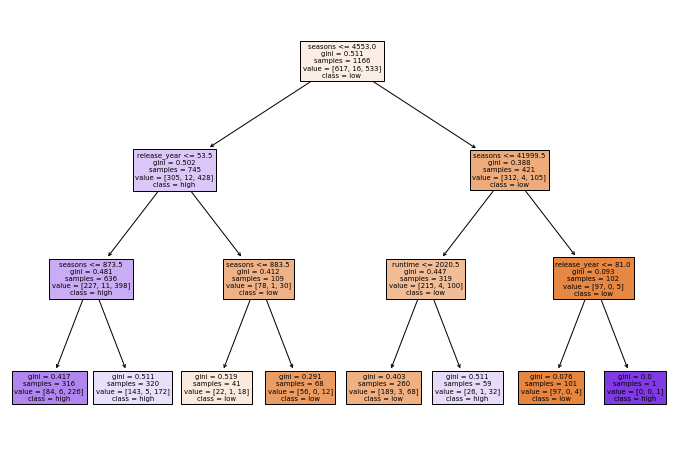

In [39]:
# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(tree, feature_names=X.columns, class_names=labels, filled=True)
plt.savefig("tree.jpg", dpi=300)
plt.show()

In [31]:
df['genreMain'] = df['genres'].apply(lambda x: x.split(',')[0])

genre_mapping = {
    "['documentation']": "documentary",
    "['drama']": "drama",
    "['fantasy']": "fantasy",
    "['war']": "war",
    "['comedy']": "comedy",
    #"['comedy']": "comedy",
    "['thriller']": "thriller",
    "['crime']": "crime",
    "['romance']": "romance",
    "['action']": "action",
    "['western']": "western",
    "['history']": "history",
    "['drama']": "drama",
    "['music']": "music",
    "['romance']": "romance",
    "['horror']": "horror",
    #"['horror']": "horror",
    "['scifi']": "sci-fi",
    "['animation']": "animation",
    #"['family']": "family",
    "['family']": "family",
    #"['reality']": "reality",
    "['reality']": "reality",
    "['documentation']": "documentary",
    '[]': "unknown",
    "['thriller']": "thriller",
    "['western']": "western",
    "['animation']": "animation",
    "['war']": "war",
    "['music']": "music",
    "['fantasy']": "fantasy",
    "['action']": "action",
    "['crime']": "crime",
    "['scifi']": "sci-fi",
    "['sport']": "sport"
}

df['genreMain'] = df['genreMain'].map(genre_mapping)
df.columns

Index(['id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'genres', 'production_countries',
       'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity',
       'tmdb_score', 'imdb_category', 'genreMain'],
      dtype='object')

In [32]:
oneHotdf=df[['release_year', 'runtime','seasons','imdb_score','imdb_votes','tmdb_popularity','tmdb_score','genreMain']]
oneHotdf.dropna(inplace=True)
encoder = OneHotEncoder(handle_unknown='ignore')
encoder_df = pd.DataFrame(encoder.fit_transform(oneHotdf[['genreMain']]).toarray())
final_df = pd.concat([oneHotdf.reset_index(drop=True), encoder_df], axis=1)
new_names = {2:'comedy',
             6:'family',
             7:'reality',
             5:'drama',
             4:'documentary',
             1:'animation',
             9:'unknown',
             0:'action',
             3:'crime',
             8:'sci-fi'}
final_df = final_df.rename(columns=new_names)

C:\Users\drewj\AppData\Local\Temp\ipykernel_13176\2411395290.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  oneHotdf.dropna(inplace=True)


In [33]:
final_df[final_df['genreMain']=='family']

,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,genreMain,action,animation,comedy,crime,documentary,drama,family,reality,sci-fi,unknown
2,1983,26,39.0,6.7,3145.0,5.935,6.8,family,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
52,2015,25,6.0,5.8,1026.0,5.445,8.1,family,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
62,2016,87,1.0,5.5,326.0,2.334,9.0,family,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
135,2018,23,2.0,5.6,117.0,1.960,8.5,family,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
197,2020,25,1.0,6.4,175.0,5.310,9.2,family,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
224,2020,7,1.0,5.0,163.0,3.313,8.0,family,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
297,2021,28,1.0,7.3,479.0,2.959,6.9,family,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


<AxesSubplot:>

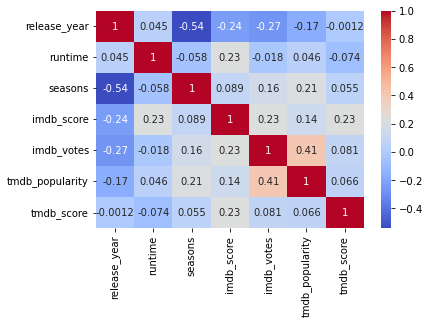

In [34]:
corr_matrix = oneHotdf.corr()

# plot the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')


## One Hot Encode Model

In [35]:
X = final_df[['release_year', 'runtime', 'seasons', 'imdb_score', 'imdb_votes', 'tmdb_score', 'comedy', 'family',
       'reality', 'drama', 'documentary', 'animation', 'unknown', 'action',
       'crime', 'sci-fi']]
y = final_df['tmdb_popularity']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model and fit it to the training data
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Use the model to make predictions on the test set
y_pred = lr_model.predict(X_test)

# Evaluate the model's performance using RMSE and R-squared
rmse = mean_squared_error(y_test, y_pred, squared=False)
r_squared = r2_score(y_test, y_pred)

print("Root Mean Squared Error: {:.2f}".format(rmse))
print("R-squared: {:.2f}".format(r_squared))

Root Mean Squared Error: 9.65
R-squared: 0.27


In [36]:
X = final_df[['release_year', 'runtime', 'seasons', 'imdb_score', 'imdb_votes', 'tmdb_score', 'comedy', 'family',
       'reality', 'drama', 'documentary', 'animation', 'unknown', 'action',
       'crime', 'sci-fi']]
y = final_df['tmdb_popularity']

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create and fit the Lasso model
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

# print the coefficients
print(lasso.coef_)
print(lasso.intercept_)

# make predictions on the test set and calculate the R-squared score
y_pred = lasso.predict(X_test)
print(lasso.score(X_test, y_test))

[ 1.62559446e-02 -6.55640914e-04  4.21537646e-01 -1.33843566e-01
  1.42600492e-04  5.38690181e-01  5.90625913e-01 -2.64989636e+00
 -2.10933131e+00  6.53135983e+00  6.73682450e-01 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00]
-29.38481722740052
0.2517077896270121


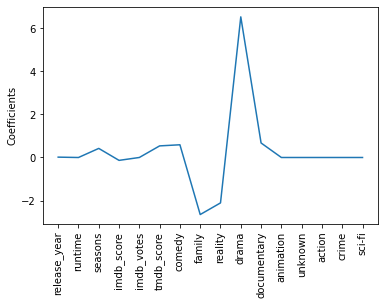

In [37]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

# Plot coefficients
plt.plot(range(X.shape[1]), lasso.coef_)
plt.xticks(range(X.shape[1]), X.columns, rotation=90)
plt.ylabel('Coefficients')
plt.savefig("LassoResid.jpg")
plt.show()

Mean Squared Error: 93.37156095004013


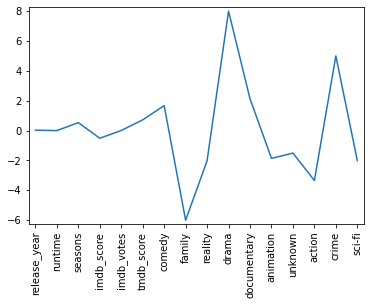

In [17]:
ridge = Ridge(alpha=0.5)
ridge.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = ridge.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

# Plot the coefficients
import matplotlib.pyplot as plt
plt.plot(range(X.shape[1]), ridge.coef_)
plt.xticks(range(X.shape[1]), X.columns, rotation=90)
plt.margins(0.02)
plt.show()

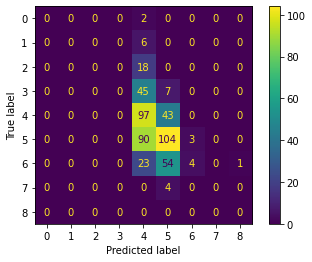

Mean squared error: 0.9931325011525108
R-squared score: 0.17695190668489835


In [18]:
X = df[['runtime', 'release_year', 'imdb_votes','tmdb_popularity','seasons']]
y = df['imdb_score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
display = confusion_matrix(y_test.astype(int), y_pred.astype(int))
disp=ConfusionMatrixDisplay(display)
disp.plot()
plt.show()
print(f"Mean squared error: {mse}")
print(f"R-squared score: {r2}")


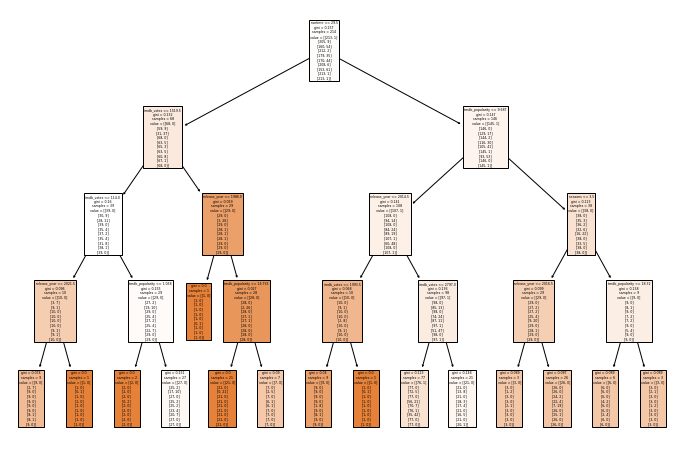

In [19]:
genres = df['genreMain'].str.get_dummies(',')
df = pd.concat([df, genres], axis=1)
df.dropna(inplace=True)

# Select the features and target variable
X = df[['runtime', 'release_year', 'imdb_votes','tmdb_popularity','seasons']]
y = df[list(genres.columns)]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create an instance of the DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=4, random_state=42)

# Train the model on the training set
tree.fit(X_train, y_train)

# Predict the target variable for the testing set
y_pred = tree.predict(X_test)

# Calculate the accuracy score of the model
accuracy = accuracy_score(y_test, y_pred)

# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(tree, feature_names=X.columns, class_names=list(genres.columns), filled=True)
plt.show()


## Linear Regression Model - V2

In [20]:
#first use genre and tmdb score to predict tmdb popularity
X = df[['genreMain', 'tmdb_score']].values
y = df['tmdb_popularity'].values

# Create a LinearRegression object
lr = LinearRegression()

# Fit the model to the data
lr.fit(X, y)

# Make predictions
y_pred = lr.predict(X)

#calculate the accuracy of y_pred
mse = mean_squared_error(y, y_pred)

# Plot the linear regression line
plt.figure(figsize=(12, 8))
plt.scatter(X, y, color='blue')
plt.plot(X, y_pred, color='red')
plt.xlabel('Genre')
plt.ylabel('TMDB Popularity')
plt.show()

ValueError: could not convert string to float: 'comedy'

In [ ]:
#drop NaN values from 'imdb_score' column
df.dropna(subset=['imdb_score'], inplace=True)

#next use genre and imdb score to predict imdb popularity
X = df[['genreMain', 'imdb_score']].values
y = df['imdb_votes'].values

# Create a LinearRegression object
lr = LinearRegression()

# Fit the model to the data
lr.fit(X, y)

# Make predictions
y_pred = lr.predict(X)

#calculate the accuracy of y_pred
mse = mean_squared_error(y, y_pred)

# Plot the linear regression line
plt.figure(figsize=(12, 8))
plt.scatter(X, y, color='blue')
plt.plot(X, y_pred, color='red')
plt.xlabel('Genre')
plt.ylabel('IMDB Votes')
plt.show()

### Let's try to improve the model by minimizing the average loss

We can do this using a regularization technique such as Ridge or Lasso regression. 

In [ ]:
from sklearn.linear_model import Ridge

X = df[['genreMain', 'tmdb_score']].values
y = df['tmdb_popularity'].values

# Create a Ridge object with regularization parameter alpha
ridge = Ridge(alpha=0.5)

# Fit the model to the data
ridge.fit(X, y)

# Make predictions
y_pred = ridge.predict(X)


Let's evaluate the performance of the Ridge regression model:

In [ ]:
from sklearn.model_selection import cross_val_score

# Calculate the cross-validation score using 5-fold cross-validation
scores = cross_val_score(ridge, X, y, cv=5, scoring='neg_mean_squared_error')

# Convert the scores to positive values and calculate the mean and standard deviation
mse_scores = -scores
mse_mean = mse_scores.mean()
mse_std = mse_scores.std()